In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [2]:
df = pd.read_csv('Beijing2022.csv') 
df


,OBJECTID,Name,Layer,Average housing prices,Distance away from CBD,Financial institution density,Retail store density,School density,Park density,Technology companies,Commercial building density,Medical institution density,Road density
0,233,Andingmen sub district,neighborhood,135993.75,6.69,2.88,42.04,14.97,28.8,1,42.61,21.31,20.89
1,268,Anding town,neighborhood,30305.95,33.06,0.18,1.17,0.15,0.6,2,0.10,0.44,5.05
2,299,Anzhen sub district,neighborhood,126000.93,8.92,27.94,33.34,15.77,13.5,12,36.05,36.50,17.08
3,280,Olympic Village sub district,neighborhood,79633.91,13.79,6.06,5.75,2.54,6.7,57,8.86,9.33,16.27
4,78,Babaoshan sub district,neighborhood,52553.02,19.34,13.51,23.19,5.10,22.9,1,10.96,20.39,11.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,266,Zhongguancun National Independent Innovation D...,neighborhood,31455.44,29.34,1.61,3.36,0.29,4.4,12,4.67,5.84,8.91
327,179,Zhongguancun sub district,neighborhood,101451.29,14.11,23.05,48.94,12.28,15.1,156,44.02,30.23,17.64
328,208,Zhoukoudian Regional Office,neighborhood,19961.75,54.42,0.07,0.61,0.17,0.5,0,0.23,0.43,2.64
329,177,Zizhuyuan sub district,neighborhood,91618.33,14.08,14.25,22.73,24.49,16.0,79,38.41,18.57,13.98


In [3]:
df['Average housing prices'].describe() #查看分布

count       331.000000
mean      47003.031299
std       28291.437758
min       17553.750000
25%       25138.760000
50%       34652.760000
75%       62373.780000
max      135993.750000
Name: Average housing prices, dtype: float64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   OBJECTID                       331 non-null    int64  
 1   Name                           331 non-null    object 
 2   Layer                          331 non-null    object 
 3   Average housing prices         331 non-null    float64
 4   Distance away from CBD         331 non-null    float64
 5   Financial institution density  331 non-null    float64
 6   Retail store density           331 non-null    float64
 7   School density                 331 non-null    float64
 8   Park density                   331 non-null    float64
 9   Technology companies           331 non-null    int64  
 10  Commercial building density    331 non-null    float64
 11  Medical institution density    331 non-null    float64
 12  Road density                   331 non-null    flo

In [5]:
df.isnull().sum()

OBJECTID                         0
Name                             0
Layer                            0
Average housing prices           0
Distance away from CBD           0
Financial institution density    0
Retail store density             0
School density                   0
Park density                     0
Technology companies             0
Commercial building density      0
Medical institution density      0
Road density                     0
dtype: int64

In [6]:
df=df.dropna()
df

,OBJECTID,Name,Layer,Average housing prices,Distance away from CBD,Financial institution density,Retail store density,School density,Park density,Technology companies,Commercial building density,Medical institution density,Road density
0,233,Andingmen sub district,neighborhood,135993.75,6.69,2.88,42.04,14.97,28.8,1,42.61,21.31,20.89
1,268,Anding town,neighborhood,30305.95,33.06,0.18,1.17,0.15,0.6,2,0.10,0.44,5.05
2,299,Anzhen sub district,neighborhood,126000.93,8.92,27.94,33.34,15.77,13.5,12,36.05,36.50,17.08
3,280,Olympic Village sub district,neighborhood,79633.91,13.79,6.06,5.75,2.54,6.7,57,8.86,9.33,16.27
4,78,Babaoshan sub district,neighborhood,52553.02,19.34,13.51,23.19,5.10,22.9,1,10.96,20.39,11.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,266,Zhongguancun National Independent Innovation D...,neighborhood,31455.44,29.34,1.61,3.36,0.29,4.4,12,4.67,5.84,8.91
327,179,Zhongguancun sub district,neighborhood,101451.29,14.11,23.05,48.94,12.28,15.1,156,44.02,30.23,17.64
328,208,Zhoukoudian Regional Office,neighborhood,19961.75,54.42,0.07,0.61,0.17,0.5,0,0.23,0.43,2.64
329,177,Zizhuyuan sub district,neighborhood,91618.33,14.08,14.25,22.73,24.49,16.0,79,38.41,18.57,13.98


In [7]:
y=df["Average housing prices"]
y

0      135993.75
1       30305.95
2      126000.93
3       79633.91
4       52553.02
         ...    
326     31455.44
327    101451.29
328     19961.75
329     91618.33
330     84450.91
Name: Average housing prices, Length: 331, dtype: float64

In [8]:
X= df[df.columns[4:]]
X

,Distance away from CBD,Financial institution density,Retail store density,School density,Park density,Technology companies,Commercial building density,Medical institution density,Road density
0,6.69,2.88,42.04,14.97,28.8,1,42.61,21.31,20.89
1,33.06,0.18,1.17,0.15,0.6,2,0.10,0.44,5.05
2,8.92,27.94,33.34,15.77,13.5,12,36.05,36.50,17.08
3,13.79,6.06,5.75,2.54,6.7,57,8.86,9.33,16.27
4,19.34,13.51,23.19,5.10,22.9,1,10.96,20.39,11.40
...,...,...,...,...,...,...,...,...,...
326,29.34,1.61,3.36,0.29,4.4,12,4.67,5.84,8.91
327,14.11,23.05,48.94,12.28,15.1,156,44.02,30.23,17.64
328,54.42,0.07,0.61,0.17,0.5,0,0.23,0.43,2.64
329,14.08,14.25,22.73,24.49,16.0,79,38.41,18.57,13.98


In [9]:
df.describe()

,OBJECTID,Average housing prices,Distance away from CBD,Financial institution density,Retail store density,School density,Park density,Technology companies,Commercial building density,Medical institution density,Road density
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,166.000000,47003.031299,34.082356,7.422326,14.241299,4.291662,6.615106,10.169184,12.007734,10.422961,8.104350
std,95.695698,28291.437758,25.490742,13.782171,17.911731,9.092547,7.964913,19.970776,15.689438,14.009121,5.991253
min,1.000000,17553.750000,1.110000,0.000000,0.150000,0.000000,0.000000,0.000000,0.000000,0.010000,0.300000
25%,83.500000,25138.760000,12.990000,0.125000,1.305000,0.180000,0.550000,0.500000,0.345000,0.460000,2.920000
50%,166.000000,34652.760000,28.320000,1.070000,4.390000,1.240000,3.400000,3.000000,4.140000,3.480000,6.830000
75%,248.500000,62373.780000,50.830000,10.620000,22.790000,6.070000,10.350000,11.000000,19.400000,18.350000,11.605000
max,331.000000,135993.750000,116.430000,108.260000,80.120000,88.930000,47.900000,156.000000,63.380000,99.890000,33.390000


In [10]:
X.select_dtypes(include=['object']).columns #no object columns

Index([], dtype='object')

vif

In [11]:
df1 = df[df.columns[4:]]
df1

,Distance away from CBD,Financial institution density,Retail store density,School density,Park density,Technology companies,Commercial building density,Medical institution density,Road density
0,6.69,2.88,42.04,14.97,28.8,1,42.61,21.31,20.89
1,33.06,0.18,1.17,0.15,0.6,2,0.10,0.44,5.05
2,8.92,27.94,33.34,15.77,13.5,12,36.05,36.50,17.08
3,13.79,6.06,5.75,2.54,6.7,57,8.86,9.33,16.27
4,19.34,13.51,23.19,5.10,22.9,1,10.96,20.39,11.40
...,...,...,...,...,...,...,...,...,...
326,29.34,1.61,3.36,0.29,4.4,12,4.67,5.84,8.91
327,14.11,23.05,48.94,12.28,15.1,156,44.02,30.23,17.64
328,54.42,0.07,0.61,0.17,0.5,0,0.23,0.43,2.64
329,14.08,14.25,22.73,24.49,16.0,79,38.41,18.57,13.98


Text(0.5, 1.0, 'Correlation Matrix')

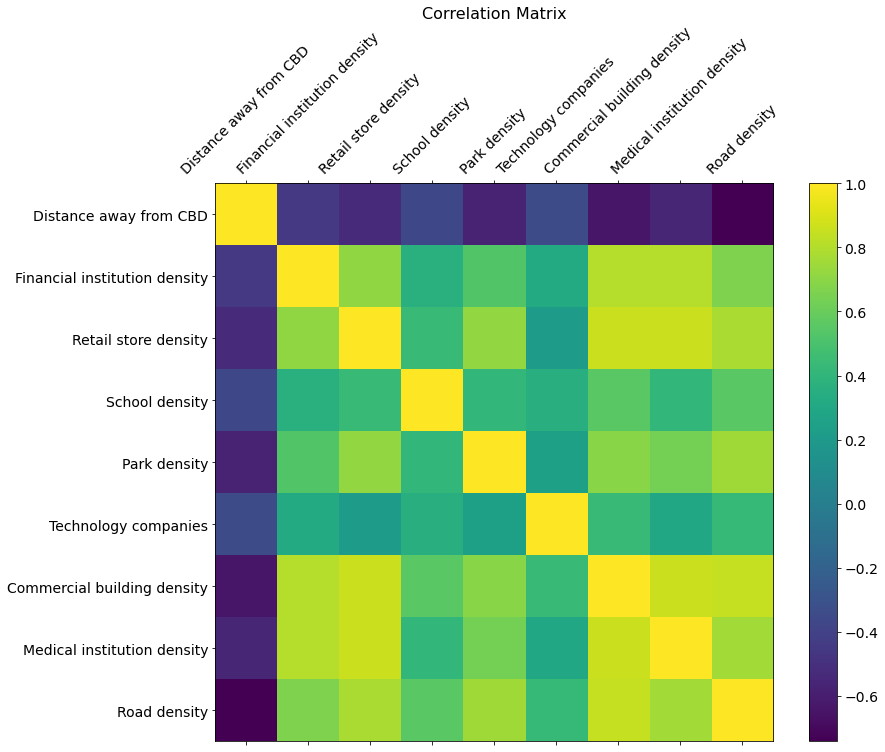

In [12]:
df=df1
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(13, 10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [13]:
# calculating VIF
# This function is amended from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, list_var_not_to_remove=None, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param list_var_not_to_remove: the list of variables that should not be removed even though it has a high VIF. For example, dummy (or indicator) variables represent a categorical variable with three or more categories.
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const as const should not be removed
        vif_df = vif_df.drop('const')
        
        # drop the variables that should not be removed
        if list_var_not_to_remove is not None:
            vif_df = vif_df.drop(list_var_not_to_remove)
            
        print('Max VIF:', vif_df.VIF.max())
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [14]:
x_VIF = drop_column_using_vif_(X, thresh=5)
print("The columns remaining after VIF selection are:")
print(x_VIF.columns)

Max VIF: 9.422305534136887
Dropping: Commercial building density
Max VIF: 5.795985359618649
Dropping: Road density
Max VIF: 5.708734629982883
Dropping: Medical institution density
Max VIF: 3.185313534208522
The columns remaining after VIF selection are:
Index(['Distance away from CBD', 'Financial institution density',
       'Retail store density', 'School density', 'Park density',
       'Technology companies'],
      dtype='object')


/Users/lin/opt/anaconda3/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Regression

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
reg = LinearRegression().fit(x_VIF, y)

In [17]:
print('Constant term: ', reg.intercept_)
df_coef_lr_VIF = pd.DataFrame({"var": x_VIF.columns.values, "coef":reg.coef_})
print(df_coef_lr_VIF)

Constant term:  46585.80618720586
                             var        coef
0         Distance away from CBD -398.657179
1  Financial institution density  343.905710
2           Retail store density  240.561727
3                 School density  503.531119
4                   Park density  616.777239
5           Technology companies  175.518253


In [18]:
# fit a lineare regression model using statsmodel
regressor_OLS = sm.OLS(endog=y, exog=sm.add_constant(x_VIF)).fit()
regressor_OLS.summary()

/Users/lin/opt/anaconda3/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Average housing prices   R-squared:                       0.723
Model:                                OLS   Adj. R-squared:                  0.717
Method:                     Least Squares   F-statistic:                     140.7
Date:                    Sun, 18 Sep 2022   Prob (F-statistic):           4.17e-87
Time:                            07:32:00   Log-Likelihood:                -3649.8
No. Observations:                     331   AIC:                             7314.
Df Residuals:                         324   BIC:                             7340.
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          4.659e+04   2329.777     19.996      0.000     4.2e+04    5.12e+04
Distance away from CBD         -398.6572     41.801     -9.537      0.000    -480.893    -316.421
Financial institution density   343.9057     88.072      3.905      0.000     170.641     517.170
Retail store density            240.5617     82.480      2.917      0.004      78.298     402.825
School density                  503.5311    107.010      4.705      0.000     293.009     714.053
Park density                    616.7772    158.711      3.886      0.000     304.544     929.011
Technology companies            175.5183     46.929      3.740      0.000      83.195     267.842
==============================================================================
Omnibus:                       74.143   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.122
Skew:                           1.065   Prob(JB):                     2.33e-41
Kurtosis:                       6.006   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""